In [1]:
#script by rikardoroa
#just pythonit!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import removedup

class data_cleaning():
    #utilizamos plantilla de seaborn
    sns.set()
    
    #inicializacion
    def __init__(self, data = pd.DataFrame(),clean_data = pd.DataFrame()):
        self.data = pd.read_csv('data.csv', header=None, encoding='latin-1', sep=';')
        self.clean_data = clean_data
        
    #lectura y renombramiento de columnas
    def data_read(function):
        try:
        
            def rename(self,*args,**kwargs):#paso la funcion como argumento
                aux = []
                cols = function(*args,**kwargs) # paso los argumentos de cols_rename
                data = self.data
                counter =  data.columns.size

                for item in range(counter):
                    aux.append(item)

                #se ejecuta el renombramiento
                json_cols = dict(zip(aux,cols))  
                data = data.rename(columns=json_cols) 
                self.data = data
                return data.head()
            return rename
        
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
    
    #exploracion inicial 
    def explore_data(self):
        try:
            data = self.data
            df = (data.describe(include='object'), data.describe())
            df = [df[i] for i, item in enumerate(zip(df))]
            return df
            data = self.data
            #return data.describe(include='object'), data.describe()
            
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise

    #implementando un decorador para el renombramiento
    @data_read
    def cols_rename(*args,**kwargs):
        try:
            cols=['Id','Marca','Modelo','Año','Costo','Localidad_Origen','Localidad_Destino','Sexo',
                  'Valor_1','Km_Inicial','Km_Final','Color','Valor_3','Valor_2']
            return cols
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
    
    #verificamos si hay duplicados
    def explore_duplicates(self):
        try:
            data = self.data
            clean_data = removedup.explore_duplicates(data)
            self.clean_data = clean_data
            return clean_data
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
    
    def exploring_nulls(self):
        try:
            data = self.clean_data
            duplicates = removedup.exploring_nulls_inf(data)
            return duplicates
        except (NameError,TypeError,UnboundLocalError) as error:
                print('Declare la variable correcta:',error) 
                raise
    
    
    
    def discovery_data(self):
        try:
            data = self.data
            #agrupando y contando valores
            data = data.groupby(['Marca','Año','Sexo'])['Sexo'].agg(['count']).rename(columns={'count':'Conteo'}).\
            sort_values('Conteo',ascending=True).reset_index() 

            #agrupamos los totales por año
            data_ = data.groupby(['Año'])['Conteo'].agg(['sum']).rename(columns={'sum':'totales'}).reset_index()

            #generando el grafico
            removedup.generating_barplot(data=data_,tam=(10,7),colors=['#ff9999',  '#4da6ff'],
                                         title='Totalizado de los mayores registros de Marcas(Autos) Por Año'
                                       ,xlabel='Año',ylabel='Cantidad',cola='totales',colb='Año')

            self.data  = data 
            
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
    def discovery_data_by_genre(self):
        try:
            #instanciando el df
            data_ = self.data
            #agrupando la data
            totales_gen_f  = data_.loc[data_['Sexo']=='F'].groupby(['Año'])['Conteo'].agg(['sum']).\
            rename(columns={'sum':'totales'}).reset_index()
            totales_gen_m  = data_.loc[data_['Sexo']=='M'].groupby(['Año'])['Conteo'].agg(['sum']).\
            rename(columns={'sum':'totales'}).reset_index()

            #generando el grafico
            removedup.generating_stakedbarplot('Totalizado de los mayores registro de Marcas(Autos) Por Genero y Año',
                                  'Año','Cantidad',totales_gen_f,'totales',totales_gen_m,'totales','Año',(10,7),'F','M')
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
        
    def Average_per_year(self):
        try:
            #calculamos el promedio por año
            Average_Costo = self.clean_data
            Average_Costo = Average_Costo.groupby(['Año'])['Costo'].agg(['mean']).rename(columns={'mean':'Promedio'}).reset_index()
            Average_Costo['Promedio'] = Average_Costo['Promedio'].astype(int)

            #generamos el grafico
            removedup.generating_lineplot(df1 = Average_Costo,col1='Año',col2='Promedio',title='Costo Promedio Por Año',tam=(10,7),
                                                     xlabel='Año',ylabel='Costo',option=1)
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
            
            
        
        
        
    def max_sales_per_year(self):
        try:
            #generamos las transformacion para calcular la marca mas usada por año
            Max_Sales = self.clean_data
            Max_Sales_right = self.clean_data
            Max_Sales = Max_Sales.groupby(['Año','Marca'])['Marca'].agg(['count'], ascending=True).rename(columns={'count':'Total'}).\
            reset_index()
            Max_Sales = Max_Sales.groupby(['Año'])['Total'].agg(['max'], ascending=True).rename(columns={'max':'Total'}).reset_index()
            Max_Sales_right = Max_Sales_right.groupby(['Año','Marca'])['Marca'].agg(['count'], ascending=True).rename(columns={'count':'Total'}).\
            reset_index()

            #Realizamos un inner join entre ambos dataframes
            total_sales_per_year = pd.merge(left=Max_Sales_right,right=Max_Sales,how="inner", on=["Año","Total"])

            removedup.sns_barplot(x='Año',y='Total',hue='Marca',df=total_sales_per_year,tam=(10,7),xlabel='Año',ylabel='total',
                                            title='Registro maximo de marca mas usada por año',option=1)
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
    
    def max_sales_per_vehicle_year(self):
        try:
            Max_Per_Year_Left = self.clean_data
            Max_Per_year_right = self.clean_data

            #generamos las agrupaciones para generar el primer dataframe
            Max_Per_Year_Left = Max_Per_Year_Left.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
            rename(columns={'count':'Total'}).reset_index()
            Max_Per_Year_Left = Max_Per_Year_Left.groupby(['Año','Sexo'])['Total'].agg(['max'], ascending=True).\
            rename(columns={'max':'Total'}).reset_index()

            #generamos las agrupaciones para generar el segundo dataframe
            Max_Per_year_right =  Max_Per_year_right.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
            rename(columns={'count':'Total'}).reset_index()

            #realizamos un inner join 
            max_vehicle_brand_per_year = pd.merge(left=Max_Per_Year_Left,right=Max_Per_year_right,how="inner", on=["Año","Total","Sexo"])

            #generamos el grafico
            removedup.generating_stakedplot(df = max_vehicle_brand_per_year,label_col='Año',col_a='Total',col_b='Marca',
                                                      filteredcol='Sexo',filteredvalue_a='F',filteredvalue_b='M',ylabel='Cantidad',
                                                       title = 'Comparativo del registro maximo de marca mas usada por año y Genero',
                                                       tam = (15,10), colors = ['#99b3ff', '#ffcccc'],option = 1,tick_b='F',tick_a='M')
        
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
        
    def min_sales_per_vehicle_year(self):
        try:
            #instanciamos el dataframe limpio
            Min_Per_Year_Left = self.clean_data
            Min_Per_year_right = self.clean_data

            #generamos las agrupaciones para generar el primer dataframe
            Min_Per_Year_Left = Min_Per_Year_Left.groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
            rename(columns={'count':'Total'}).reset_index()
            Min_Per_Year_Left = Min_Per_Year_Left.loc[Min_Per_Year_Left['Marca']!='MARCA NULA'].groupby(['Año','Sexo'])['Total'].agg(['min'], ascending=True).\
            rename(columns={'min':'Total'}).reset_index()

            #generamos las agrupaciones para generar el segundo dataframe
            Min_Per_year_right =  Min_Per_year_right.loc[Min_Per_year_right['Marca']!='MARCA NULA'].\
            groupby(['Año','Sexo','Marca'])['Marca'].agg(['count'], ascending=True).\
            rename(columns={'count':'Total'}).reset_index()

            #realizamos un inner join 
            min_vehicle_brand_per_year = pd.merge(left=Min_Per_Year_Left,right=Min_Per_year_right,how="inner", on=["Año","Total","Sexo"])

            min_vehicle_brand_per_year["Marca-Genero"] = min_vehicle_brand_per_year[['Sexo', 'Marca']].\
            apply(lambda x: f"{x.Marca}, {x.Sexo}", axis=1)

            removedup.generating_stakedplot(df = min_vehicle_brand_per_year,col_a='Año', col_b='Total',
                                                      filteredcol='Sexo',filteredvalue_a='F',filteredvalue_b='M',ylabel='Cantidad',xlabel='Año',
                                                       title = 'Comparativo del registro minimo de marca menos usada por año y Genero',
                                                       tam = (15,10),option = 2, hue="Marca-Genero")
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
        

    def Average__Km_Per_year(self):
        try:
            #Inicializamos el dataframe limpio
            Average__Km_Per_year = self.clean_data

            #generamos las agrupaciones para generar el primer dataframe
            Average__Km_Per_year['Km_Inicial'] = Average__Km_Per_year['Km_Inicial'].astype(str).\
            apply(lambda x : x.replace(',','.')).astype(float)
            Average__Km_Per_year = Average__Km_Per_year.groupby(['Año']).agg({'Km_Inicial':[('Km_Inicial','mean')],'Km_Final':
                                                                              [('Km_Final','mean')]}, ascending=True).\
            rename(columns={'Km_Inicial':'Km_Inicial','mean':'Km_Final' }).reset_index()
            Average__Km_Per_year['Km_Inicial'] = Average__Km_Per_year['Km_Inicial'].apply(lambda x : np.where(x.isnull(),0,x))

            #formateando valores
            cols = ['Km_Inicial','Km_Final']
            for item in cols:
                Average__Km_Per_year[item] = Average__Km_Per_year[item].astype('int64')

            Average__Km_Per_year.columns = Average__Km_Per_year.columns.droplevel()
            Average__Km_Per_year = Average__Km_Per_year.rename(columns={'':'Año'})
            Average__Km_Per_year = pd.melt(Average__Km_Per_year, 'Año', var_name='Promedios', value_name='Promedio')

            removedup.generating_lineplot(df1 = Average__Km_Per_year,col1='Año',col2='Promedio',
                                                      title='Kilometros Promedio por año',tam=(15,10),
                                                     xlabel='Año',ylabel='Total',hue='Promedios',option=2)
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
    def most_common_brand(self):
        try:
            #Inicializamos el dataframe limpio
            Brands = self.clean_data
            #generamos las agrupaciones para generar el primer dataframe
            Brands = Brands.groupby(['Marca'])['Marca'].agg(['count']).\
            rename(columns={'count':'Total'}).sort_values('Total',ascending=False).reset_index().head(10)

            removedup.sns_barplot(x='Marca',y='Total',df=Brands,tam=(15,7),xlabel='Marcas',ylabel='Total',
                                            title='Top 10 Marcas mas usadas',option=1)
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
        
        
        
    def max_cost_model_per_year(self):
        try:
            #Inicializamos el dataframe limpio
            Brands = self.clean_data
            Models = self.clean_data
            #generamos las agrupaciones para generar el primer dataframe
            Brands = Brands.loc[Brands['Marca'].notnull(),['Marca','Costo','Año']].\
            groupby(['Marca']).agg({'Costo':[('Costo','max')],'Año':[('Año','max')]}, ascending=True).reset_index()
            Brands.columns = Brands.columns.droplevel()
            Brands = Brands.rename(columns={'':'Marca'})
            Models = Models.loc[Models['Marca'].notnull() & Models['Modelo'].notnull(),['Marca','Modelo','Costo','Año']].\
            groupby(['Marca','Modelo','Costo'])['Año'].agg(['max'],ascending=True).rename(columns={'max':'Año'}).reset_index()
            Total_Brands = pd.merge(left=Models,right=Brands,how="inner", on=["Marca","Año","Costo"]).\
            sort_values(['Año','Costo'],ascending=True)
            Total_Brands["Marca-Modelo"] = Total_Brands[['Marca', 'Modelo']].apply(lambda x: f"{x.Marca}, {x.Modelo}", axis=1)


            removedup.sns_barplot(x='Año',y='Costo',df=Total_Brands,tam=(15,7),xlabel='Año',ylabel='Costo',
                                            title='Modelos mas costosos por año',hue='Marca-Modelo',option=2)
        
        except (NameError,TypeError,UnboundLocalError) as error:
            print('Declare la variable correcta:',error) 
            raise
         
        
        
            
          

    
        
    
        
        

In [2]:
data_cleaning = data_cleaning()

In [3]:
data_cleaning.cols_rename()

,Id,Marca,Modelo,Año,Costo,Localidad_Origen,Localidad_Destino,Sexo,Valor_1,Km_Inicial,Km_Final,Color,Valor_3,Valor_2
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,09,M,NaN,"11947500,0",NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,05,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S


In [4]:
data_cleaning.explore_data()

[                  Id    Marca   Modelo Localidad_Origen Localidad_Destino  \
 count        1006969  1006274  1006681           574639            594577   
 unique        689577       96    10762              429                41   
 top     6EA085C0-77B  HYUNDAI    RAV 4       LAS CONDES                13   
 freq               8   106758    18619            45799            152997   
 
           Sexo Km_Inicial   Color  Valor_2  
 count   122608     609000  994400  1006969  
 unique       2       5946     953        2  
 top          M          0    GRIS        S  
 freq     67439     270604  231524   688992  ,
                 Año         Costo   Valor_1      Km_Final        Valor_3
 count  1.006969e+06  1.006969e+06  197779.0  3.411520e+05  723490.000000
 mean   2.013540e+03  5.650004e+07       0.0  2.015180e+07      48.930039
 std    2.352165e+00  6.439853e+07       0.0  1.681418e+04      12.587792
 min    2.010000e+03  0.000000e+00       0.0  2.009102e+07       3.000000
 25%   

In [5]:
data_cleaning.explore_duplicates()

,Id,Marca,Modelo,Año,Costo,Localidad_Origen,Localidad_Destino,Sexo,Valor_1,Km_Inicial,Km_Final,Color,Valor_3,Valor_2
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,09,M,NaN,"11947500,0",NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,05,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006964,3C64A6BD-180,CHEVROLET,TRACKER LT 1.8,2016,43286592,NaN,NaN,NaN,NaN,11176000,NaN,AZUL,NaN,S
1006965,CAF45D98-12D,RENAULT,DUSTER,2016,321224931,VICUNA,04,NaN,NaN,NaN,NaN,GRIS,NaN,S
1006966,684771E1-3B8,HONDA,CRV EX 4X4 2.4 AUT,2011,43881138,MAIPU,METROPOLITANA DE SANTIAGO,NaN,0.0,11930000,NaN,BLANCO,40.0,S
1006967,B150A94C-313,TOYOTA,RAV4 2.4 AUT,2010,26216251,LAS CONDES,13,NaN,NaN,7290000,20130213.0,BEIGE,58.0,S


In [6]:
data_cleaning.exploring_nulls()

,Inf Values,Null Values,Col Names
0,0,0,Id
1,0,695,Marca
2,0,288,Modelo
3,0,0,Año
4,0,0,Costo
5,0,432330,Localidad_Origen
6,0,412392,Localidad_Destino
7,0,884361,Sexo
8,0,809190,Valor_1
9,0,397969,Km_Inicial


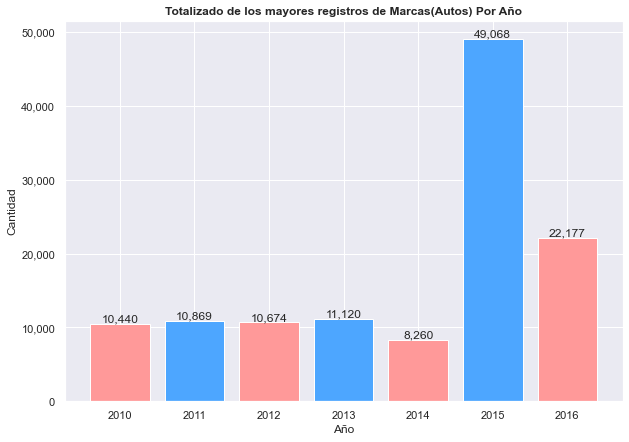

In [7]:
data_cleaning.discovery_data()

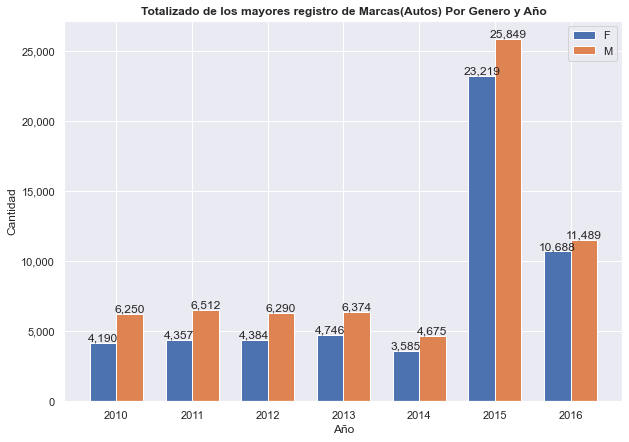

In [8]:
data_cleaning.discovery_data_by_genre()

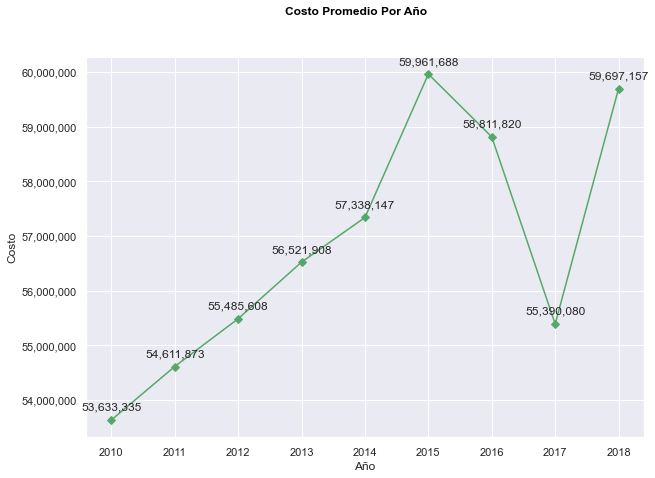

In [9]:
data_cleaning.Average_per_year()

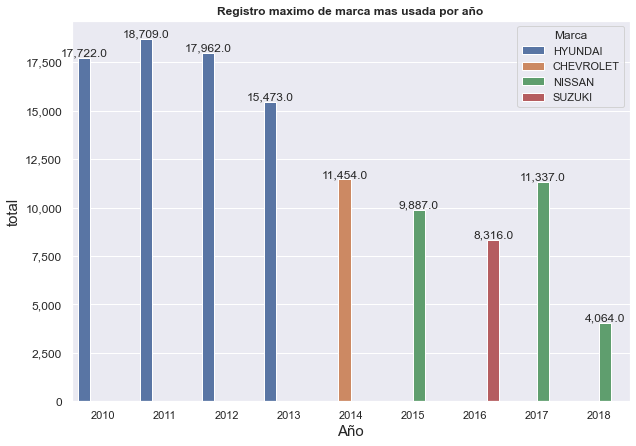

In [10]:
data_cleaning.max_sales_per_year()

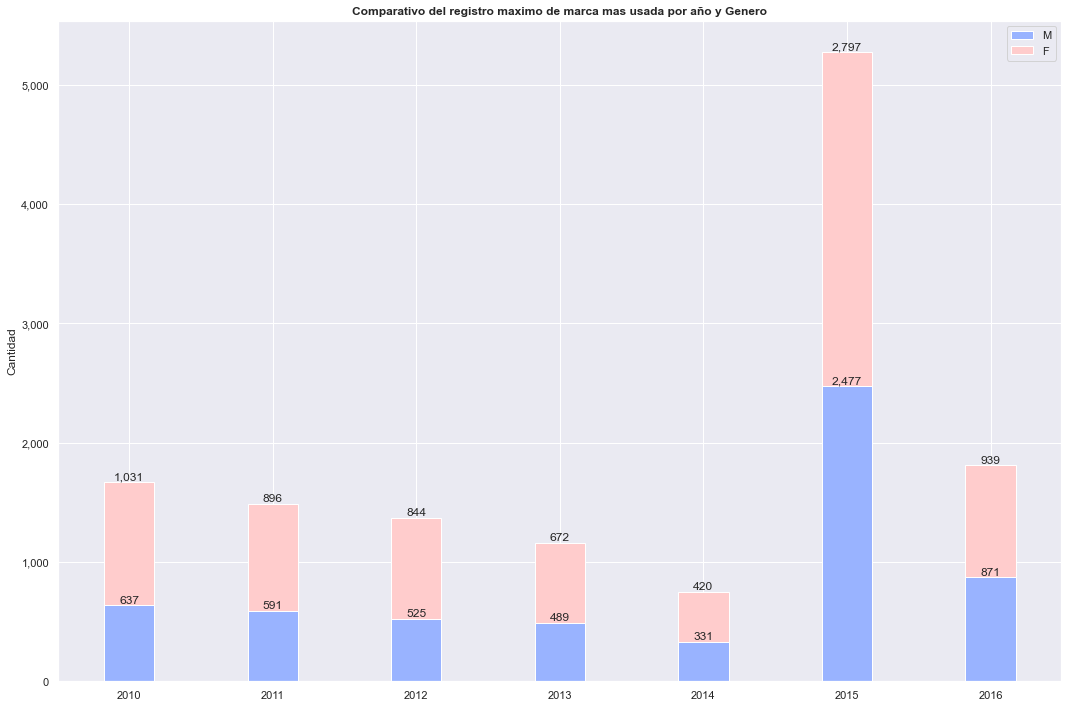

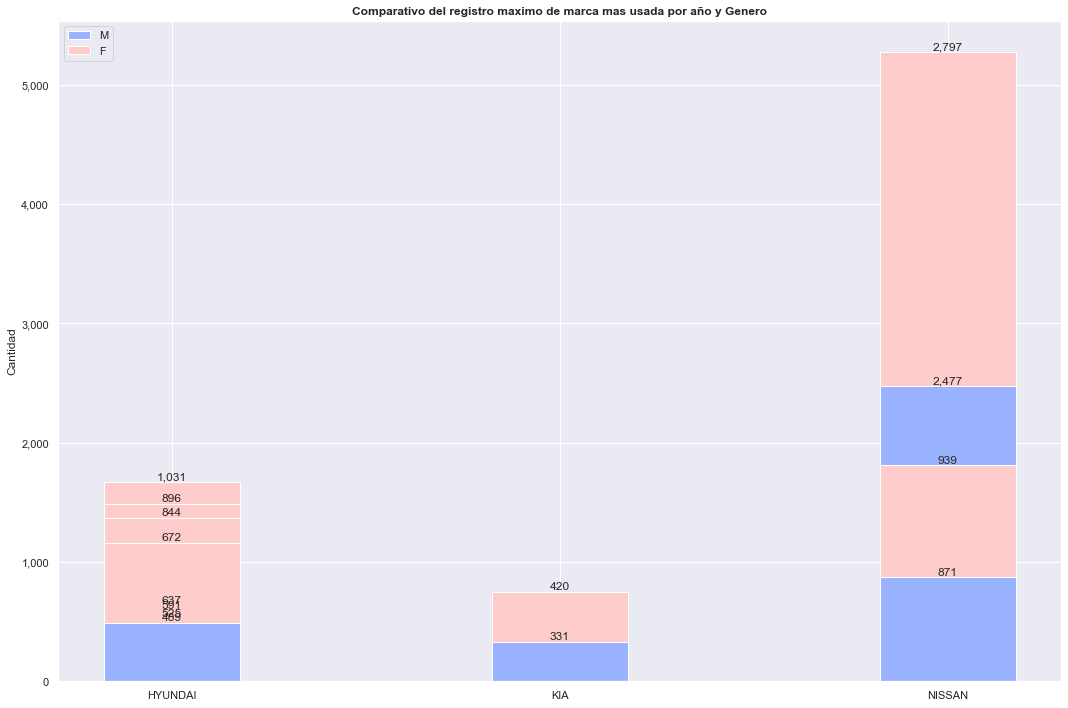

In [11]:
data_cleaning.max_sales_per_vehicle_year()

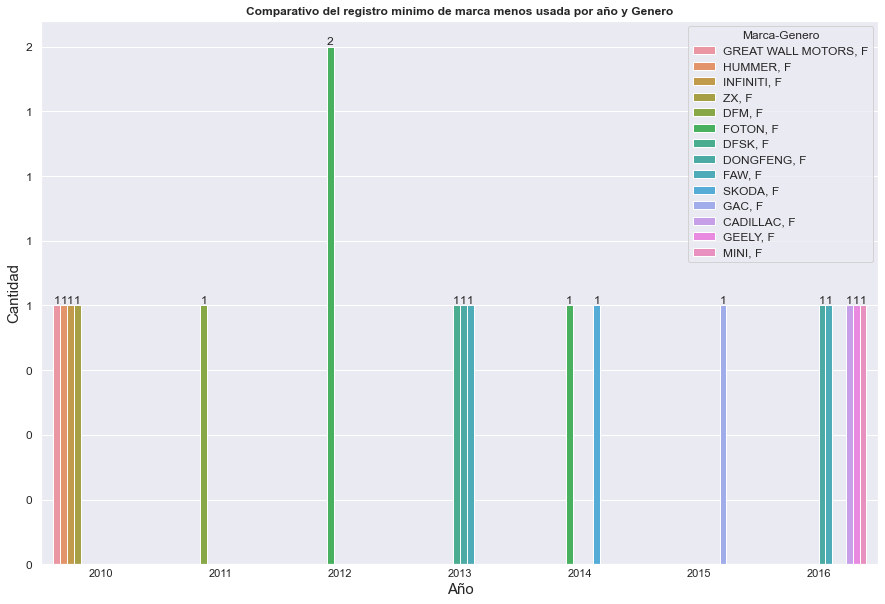

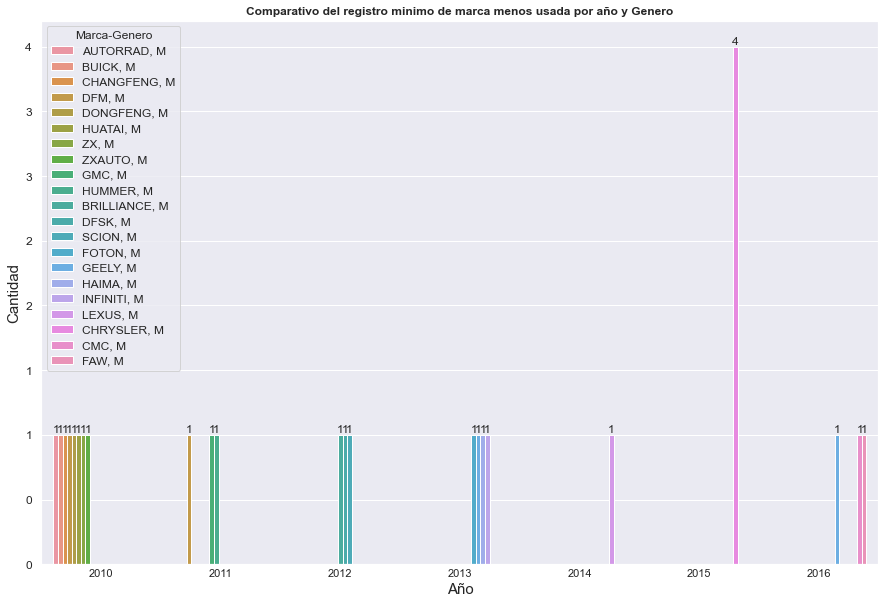

In [12]:
data_cleaning.min_sales_per_vehicle_year()

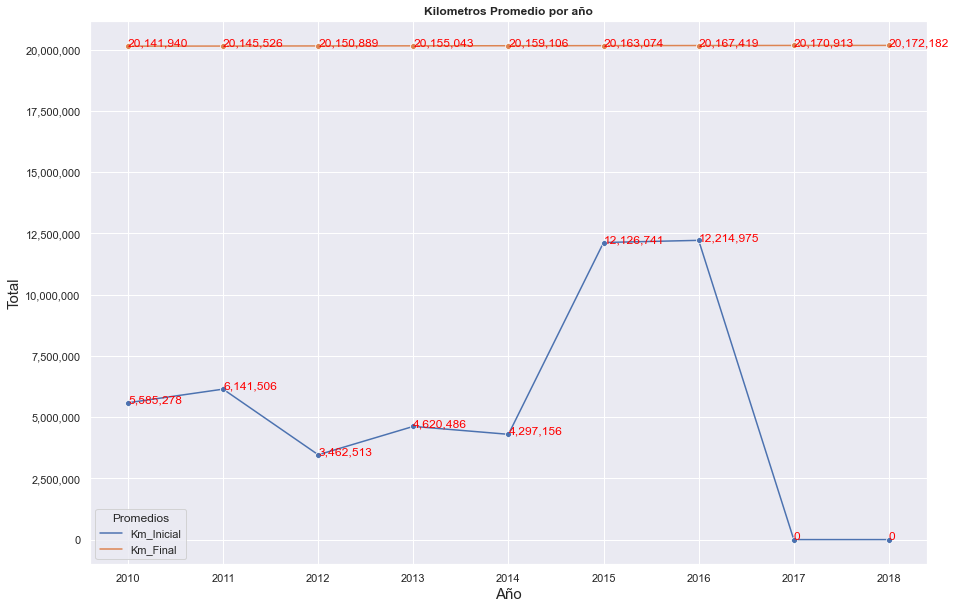

In [13]:
data_cleaning.Average__Km_Per_year()

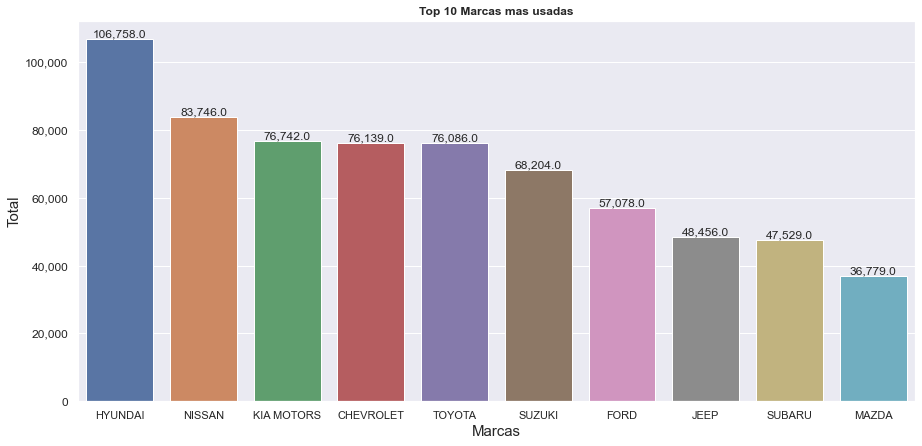

In [14]:
data_cleaning.most_common_brand()

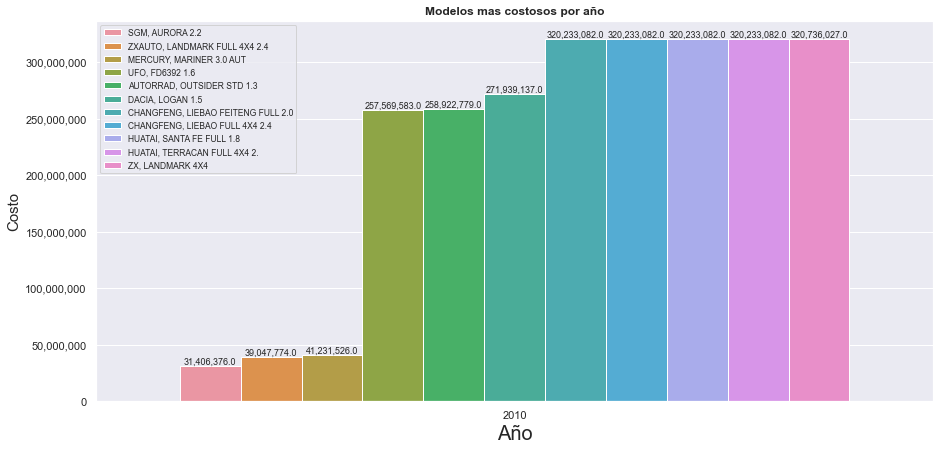

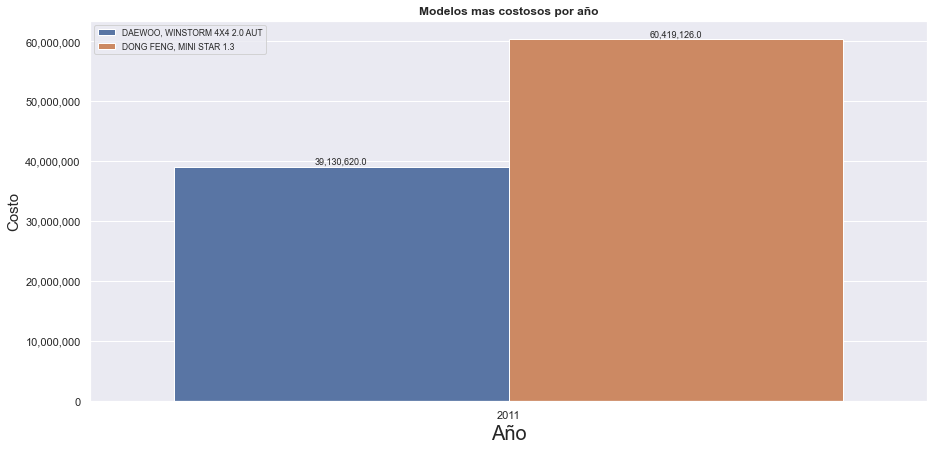

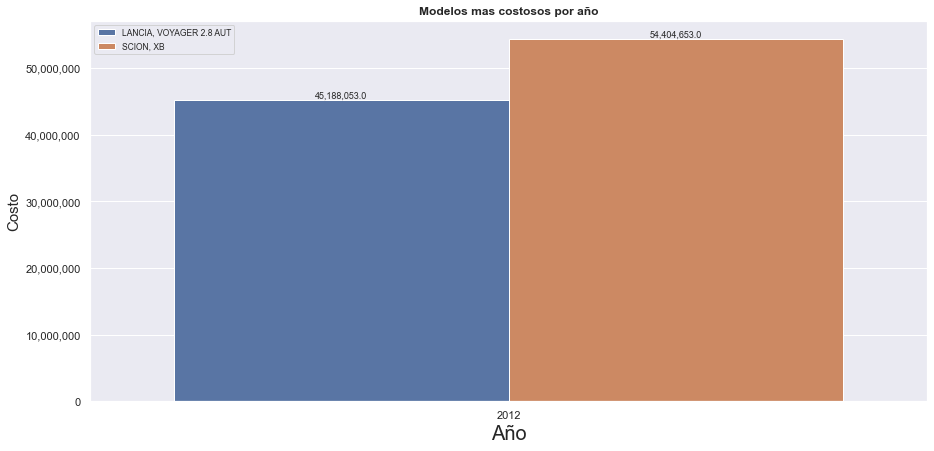

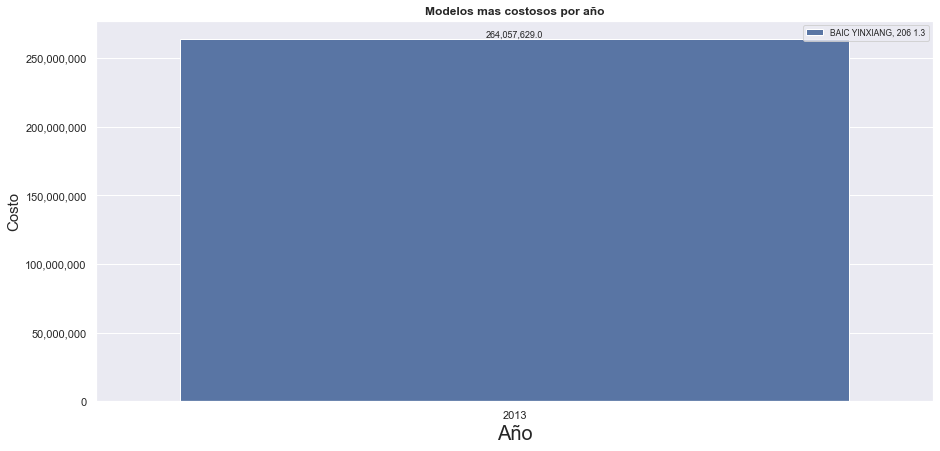

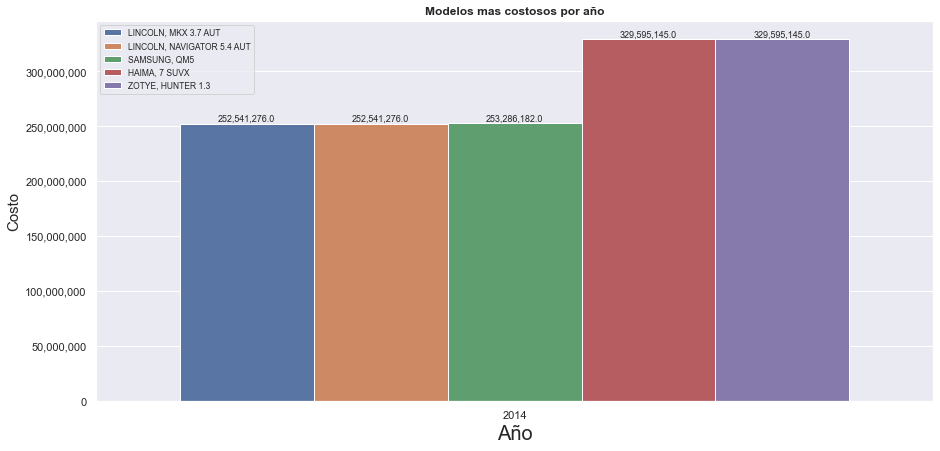

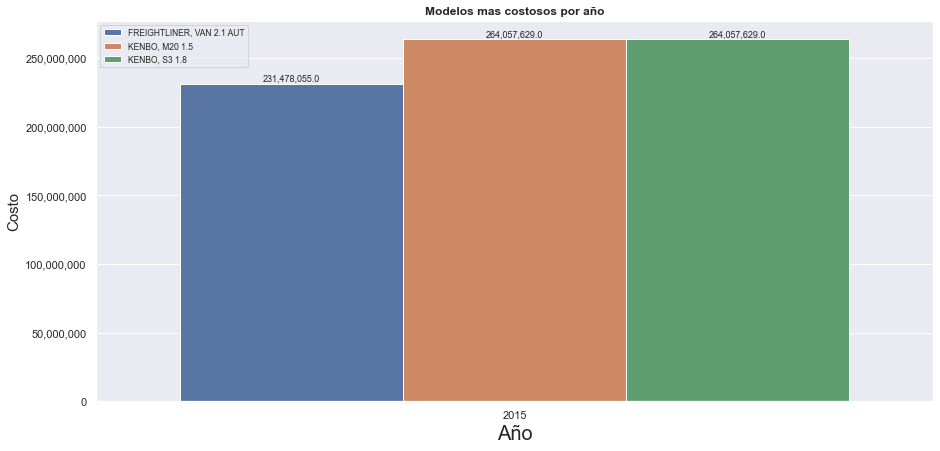

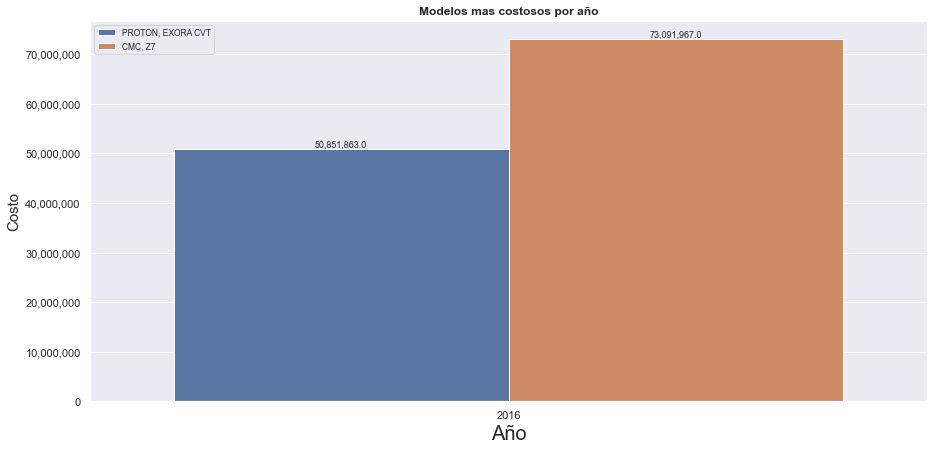

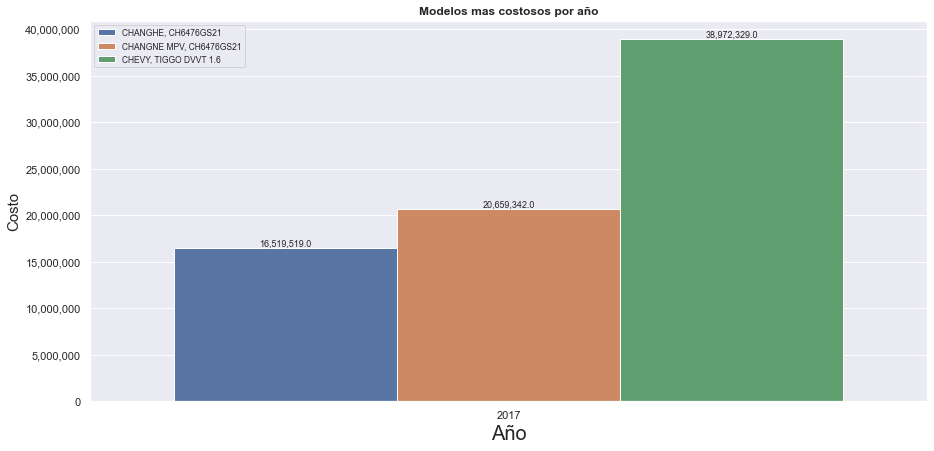

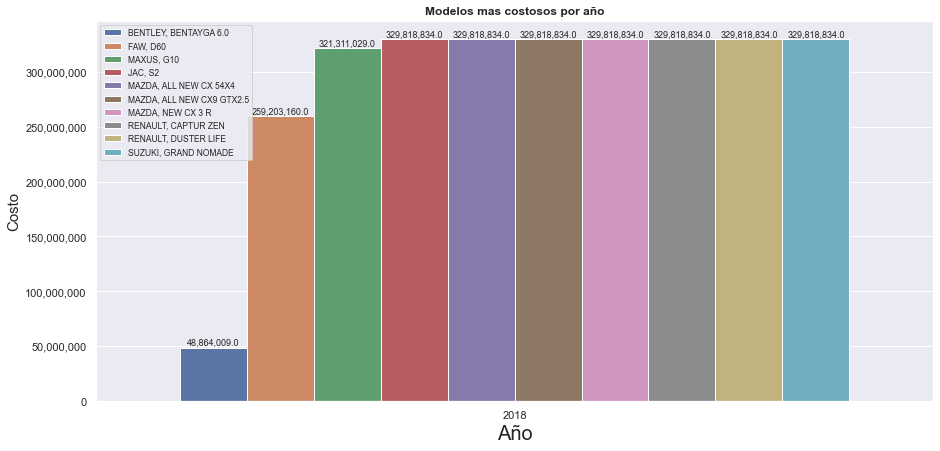

In [15]:
data_cleaning.max_cost_model_per_year()